# Titanic生存率预测

## 一 项目简介
泰坦尼克号的沉没是历史上最为著名的海难之一。1912年4月15日，泰坦尼克号在其首次航行中，与冰山相撞，最终沉没。在2224名乘客和机组人员中，有1502人遇难。这一耸人听闻的灾难震惊了当时的国际社会，并督促人们完善海上安全法则。
导致这次事故死亡率如此之高的一个重要原因是，泰坦尼克号上并没有为船上乘客和机组人员准备足够的救生船。虽然在沉船事件中幸存下来也有一些运气的因素，但有些人比其他人更有可能幸存下来，比如妇女、儿童和上层阶级。
泰坦尼克号的事故曾由著名导演詹姆斯.卡梅隆于1997年拍摄成电影，电影用影视特效逼真的还原了泰坦尼克号遇难的经过，并把影片两位主角Jack和Rose之间的爱情故事深深的刻在了人们心中。

## 二 分析目标
1. Jack和Rose是否确有其人
2. 泰坦尼克号的幸存者是否存在某些规律
3. 简单建模并预测部分人的生还

## 三 数据来源
本数据来自kaggle数据竞赛的新手赛题。数据如下：
- train.csv  包含真实结果的训练数据集
- test.csv   用于检验模型的测试数据集

## 四 数据分析

### 1 字段表
<center><h3>字 段 表</h3></center>

|Variable|Definition|Key|
|-|-|-|
|survival|是否生还|0 = No, 1 = Yes|
|pclass|几等票|1 = 1st,2 = 2nd,3 = 3rd|
|sex|性别||
|age|年龄||
|sibsp|上船的兄弟姐妹/配偶数量||
|parch|上船的父母/小孩的数量||
|ticket|船票号||
|fare|花费||
|cabin|船舱号||
|embarked|登船港口|C = Cherbourg,<br>Q = Queenstown,<br>S = Southampton|


### 2 数据分析


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [64]:
titanic_train = pd.read_csv('train.csv')
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [65]:
titanic_test = pd.read_csv('test.csv')
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [66]:
titanic_train.shape

(891, 12)

In [67]:
titanic_train.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

In [68]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**关于第一个问题：Jack和Rose是否确有其人。** 
**电影中，Rose的原名是Rose Dewitt Bukater，但后来Jack死了，Rose把Jack当成了自己的丈夫，Jack的原名叫Jack Dawson，所以Rose就说自己叫Rose Dawson。**
**分析思路：用正则表达式分别在train和test数据集中查找**

In [70]:
pattern = r'rose|jack'
regex = re.compile(pattern, flags = re.IGNORECASE)

In [71]:
titanic_train[titanic_train['Name'].str.contains(pattern, flags = re.IGNORECASE)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.50,NaN,S
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.60,NaN,C
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.35,NaN,S


In [10]:
titanic_test[titanic_test['Name'].str.contains(pattern, flags = re.IGNORECASE)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
208,1100,1,"Rosenbaum, Miss. Edith Louise",female,33.0,0,0,PC 17613,27.7208,A11,C
327,1219,1,"Rosenshine, Mr. George (Mr George Thorne"")""",male,46.0,0,0,PC 17585,79.2000,NaN,C


**从匹配结果来看，只能相信本故事情节确实纯属虚构**

**接下来看一下票的等级“Pclass”代表什么**

In [11]:
titanic_train.pivot_table('PassengerId', index = 'Pclass', columns = 'Sex', aggfunc = len, margins = True)

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


In [12]:
class_fare = titanic_train.groupby('Pclass')['Fare'].mean()

In [13]:
class_fare

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

**似乎等级越高越能花钱**

Text(0.5, 1.0, 'Fare by Pclass')

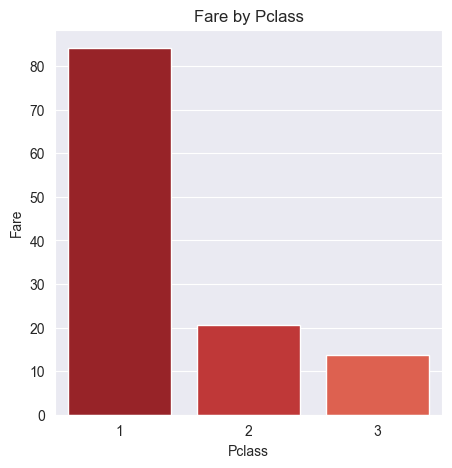

In [14]:
fig = plt.figure(figsize = (5,5))
sns.set_style('darkgrid')
sns.barplot(x = class_fare.index.values, y = class_fare.values, palette = sns.color_palette('Reds_r'))
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Fare by Pclass')

**看来票的等级越高就越有钱从而社会阶层也越高**

In [15]:
class_surv = titanic_train.groupby('Pclass')['Survived'].mean()

In [16]:
class_surv

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Survived by Pclass')

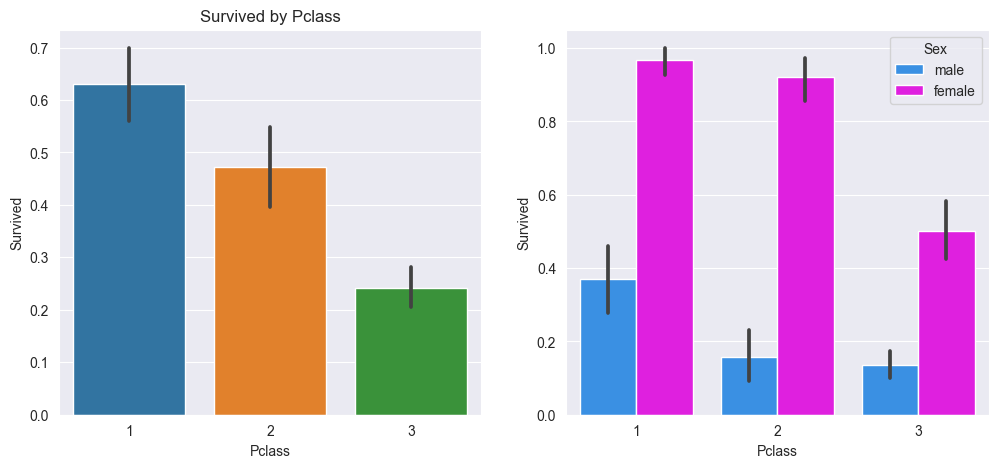

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
sns.set_style('darkgrid')
sns.barplot(x = 'Pclass', y = 'Survived', data = titanic_train, ax = ax[0])
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_train, ax = ax[1], palette = sns.color_palette(['dodgerblue', 'magenta']))
ax[0].set_title('Survived by Pclass')

**从上图中可以看出，越是上层阶级越容易活命（电影中富人与穷人收到了不公平的对待，穷人被铁门拦住而富人们则早早上了救生艇），越是女人越容易活命（也正如电影里演的，救生船有限的情况下，妇人和小孩儿被安排最先上救生船，但依然有阶级区别）**

**从总体情况看，女人比男人得到了更多获救的机会，对比如下：**

In [18]:
titanic_train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

**从年龄方面进行分析，首先来看看年龄的分布**

<AxesSubplot: xlabel='Age'>

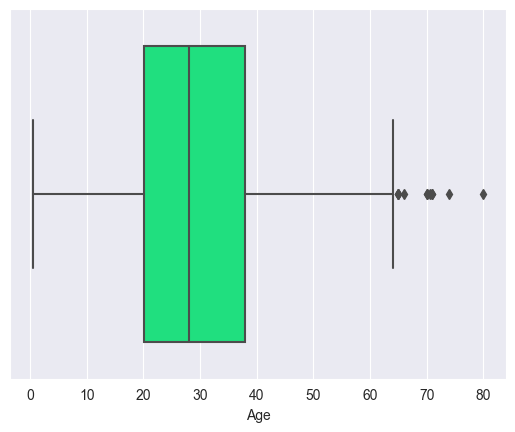

In [19]:
sns.boxplot(x = 'Age', data = titanic_train, color = 'springgreen')

In [20]:
print('the max age is: {}'.format(titanic_train.Age.max()), 'the minimum age is: {}'.format(titanic_train.Age.min()))

the max age is: 80.0 the minimum age is: 0.42


In [21]:
bins = np.arange(0,81,10)

In [22]:
bins #年龄区间

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80])

In [23]:
cats = pd.cut(titanic_train['Age'], bins)

In [24]:
age_surv_sex = titanic_train.groupby([cats, 'Sex'])['Survived'].sum().unstack(level=1)

In [25]:
age_surv_sex

Sex,female,male
Age,,
"(0, 10]",19,19
"(10, 20]",34,10
"(20, 30]",61,23
"(30, 40]",46,23
"(40, 50]",21,12
"(50, 60]",13,4
"(60, 70]",3,1
"(70, 80]",0,1


In [26]:
titanic_train['age_cats'] = cats.astype(str)

In [27]:
titanic_train.pivot_table('PassengerId', index = 'age_cats', columns = ['Sex', 'Survived'], aggfunc = len, margins = True)

Sex      female          male         All
Survived      0      1      0      1     
age_cats                                 
(0, 10]    12.0   19.0   14.0   19.0   64
(10, 20]   12.0   34.0   59.0   10.0  115
(20, 30]   20.0   61.0  126.0   23.0  230
(30, 40]    9.0   46.0   77.0   23.0  155
(40, 50]   10.0   21.0   43.0   12.0   86
(50, 60]    1.0   13.0   24.0    4.0   42
(60, 70]    NaN    3.0   13.0    1.0   17
(70, 80]    NaN    NaN    4.0    1.0    5
nan        17.0   36.0  108.0   16.0  177
All        81.0  233.0  468.0  109.0  891

In [28]:
age_surv = titanic_train.groupby(cats)['Survived'].mean()

In [29]:
age_surv

Age
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: Survived, dtype: float64

In [30]:
age_grouped = titanic_train.groupby(cats).size()

In [31]:
age_grouped

Age
(0, 10]      64
(10, 20]    115
(20, 30]    230
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 80]      5
dtype: int64

Text(0.5, 1.0, 'Age by Survived')

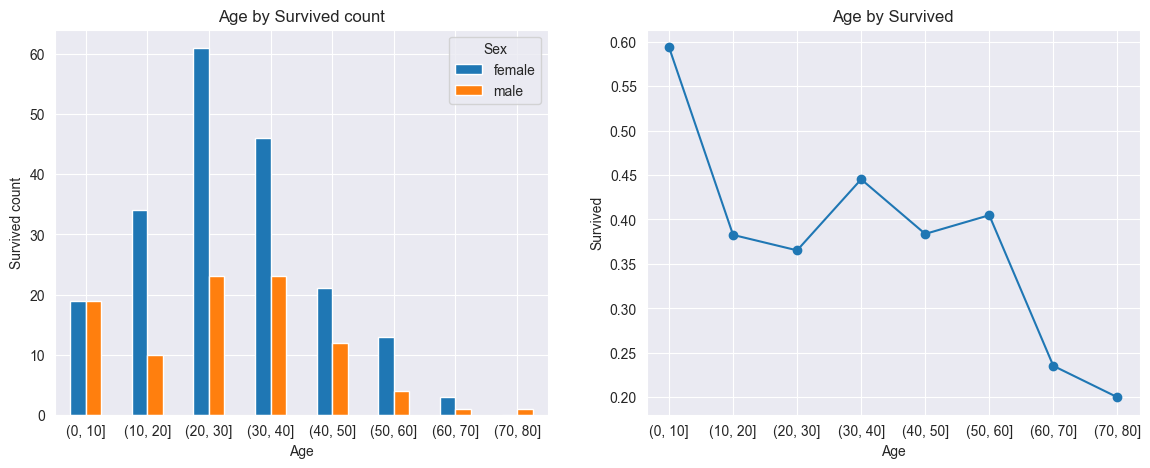

In [32]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
sns.set_style('darkgrid')
age_surv_sex.plot.bar(ax = ax[0], rot = 360)
ax[0].set_title('Age by Survived count')
ax[0].set_ylabel('Survived count')

age_surv.plot.line(ax = ax[1], marker = 'o')
plt.ylabel('Survived')
plt.title('Age by Survived')

**从上图可以看到，0-10岁的小孩有60%获救，其次是30-40岁的人有45%获救，70-80岁的人获救率最低**

### 3 数据规整
**用中位数填充年龄的缺失值**

In [72]:
mid = titanic_train['Age'].median()
age = titanic_train['Age'].fillna(mid)
titanic_test['Fare'] = titanic_test['Fare'].fillna(value=titanic_test['Fare'].median())
age_test = titanic_test['Age'].fillna(mid)
titanic_train['Age'] = age
titanic_test['Age'] = age_test

**“titanic_train”和“titanic_test”表中的“sex”列是字符类型，不便于计算，需要转换为数字。用1代表男性，0代表女性，新加入“ismale”列**

In [73]:
ismale = (titanic_train['Sex'] == 'male').astype(int)

In [74]:
ismale_test = (titanic_test['Sex'] == 'male').astype(int)

In [75]:
titanic_train['ismale'] = ismale

In [76]:
titanic_test['ismale'] = ismale_test

In [77]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ismale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### 4 预测

In [78]:
pick = ['Pclass', 'Age', 'ismale', 'SibSp', 'Parch', 'Fare']

In [79]:
x_train = titanic_train[pick]

In [80]:
y_train = titanic_train['Survived']

In [81]:
x_test = titanic_test[pick]

In [82]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

output = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived': predictions})

**输出结果集并提交给Kaggle评分**

In [83]:
output.to_csv('submission.csv', index=False)

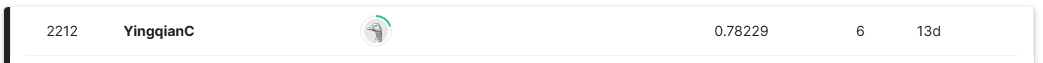

In [1]:
from IPython.display import Image
Image(filename = 'score.png')

###### **本赛题的评分是采用正确率，0.78229左右的正确率排名2212**

## 五 结论

1. **在泰坦尼克号所有乘客中，越是上层阶级幸存的人数越多。**
2. **正如电影中讲述的，最后时刻，在救生艇有限的情况下，女人和小孩优先登上了救生艇。**